<a href="https://colab.research.google.com/github/robins645/ML_Project/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df=pd.read_csv('/content/covid_toy.csv')

In [79]:
df.sample(20)

,age,gender,fever,cough,city,has_covid
56,71,Male,NaN,Strong,Kolkata,No
55,81,Female,101.0,Mild,Mumbai,Yes
14,51,Male,104.0,Mild,Bangalore,No
79,48,Female,103.0,Mild,Kolkata,Yes
58,23,Male,98.0,Strong,Mumbai,Yes
27,33,Female,102.0,Strong,Delhi,No
16,69,Female,103.0,Mild,Kolkata,Yes
93,27,Male,100.0,Mild,Kolkata,Yes
35,82,Female,102.0,Strong,Bangalore,No
77,8,Female,101.0,Mild,Kolkata,No


In [80]:
df['fever'].fillna(df['fever'].mean(), inplace=True)

<ipython-input-80-e0be83159719>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fever'].fillna(df['fever'].mean(), inplace=True)


In [81]:
df.isnull().sum()

,0
age,0
gender,0
fever,0
cough,0
city,0
has_covid,0


In [82]:
df['fever'].mean()

np.float64(100.84444444444445)

In [83]:
df['cough'].value_counts()

,count
cough,
Mild,62
Strong,38


In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
import pandas as pd


In [85]:
df_transformed


,gender_Male,city_Delhi,city_Kolkata,city_Mumbai,cough,age,fever,has_covid
0,1.0,0.0,1.0,0.0,0.0,60.0,103.0,0
1,1.0,1.0,0.0,0.0,0.0,27.0,100.0,1
2,1.0,1.0,0.0,0.0,0.0,42.0,101.0,0
3,0.0,0.0,1.0,0.0,0.0,31.0,98.0,0
4,0.0,0.0,0.0,1.0,0.0,65.0,101.0,0
...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,12.0,104.0,0
96,0.0,0.0,1.0,0.0,1.0,51.0,101.0,1
97,0.0,0.0,0.0,0.0,0.0,20.0,101.0,0
98,0.0,0.0,0.0,1.0,1.0,5.0,98.0,0


In [93]:
cough_order = ['Mild', 'Strong']

X = df.drop('has_covid', axis=1)
y = df['has_covid']


In [95]:

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['gender', 'city']),
        ('ordinal', OrdinalEncoder(categories=[cough_order]), ['cough'])
    ],
    remainder='passthrough'
)

In [96]:
X_transformed = preprocessor.fit_transform(X)
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(['gender', 'city'])
all_feature_names = list(onehot_feature_names) + ['cough', 'age', 'fever']

In [97]:

df_transformed = pd.DataFrame(X_transformed, columns=all_feature_names)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [98]:

df_transformed['has_covid'] = y_encoded

print(df_transformed.head())

   gender_Male  city_Delhi  city_Kolkata  city_Mumbai  cough   age  fever  \
0          1.0         0.0           1.0          0.0    0.0  60.0  103.0   
1          1.0         1.0           0.0          0.0    0.0  27.0  100.0   
2          1.0         1.0           0.0          0.0    0.0  42.0  101.0   
3          0.0         0.0           1.0          0.0    0.0  31.0   98.0   
4          0.0         0.0           0.0          1.0    0.0  65.0  101.0   

   has_covid  
0          0  
1          1  
2          0  
3          0  
4          0  


In [86]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [87]:
df_transformed = df_transformed.astype({col: 'int' for col in df_transformed.select_dtypes(include='float').columns})

# Check the result
print(df_transformed.dtypes)
print(df_transformed.head())

gender_Male     int64
city_Delhi      int64
city_Kolkata    int64
city_Mumbai     int64
cough           int64
age             int64
fever           int64
has_covid       int64
dtype: object
   gender_Male  city_Delhi  city_Kolkata  city_Mumbai  cough  age  fever  \
0            1           0             1            0      0   60    103   
1            1           1             0            0      0   27    100   
2            1           1             0            0      0   42    101   
3            0           0             1            0      0   31     98   
4            0           0             0            1      0   65    101   

   has_covid  
0          0  
1          1  
2          0  
3          0  
4          0  


In [88]:
df_transformed

,gender_Male,city_Delhi,city_Kolkata,city_Mumbai,cough,age,fever,has_covid
0,1,0,1,0,0,60,103,0
1,1,1,0,0,0,27,100,1
2,1,1,0,0,0,42,101,0
3,0,0,1,0,0,31,98,0
4,0,0,0,1,0,65,101,0
...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,12,104,0
96,0,0,1,0,1,51,101,1
97,0,0,0,0,0,20,101,0
98,0,0,0,1,1,5,98,0


In [89]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

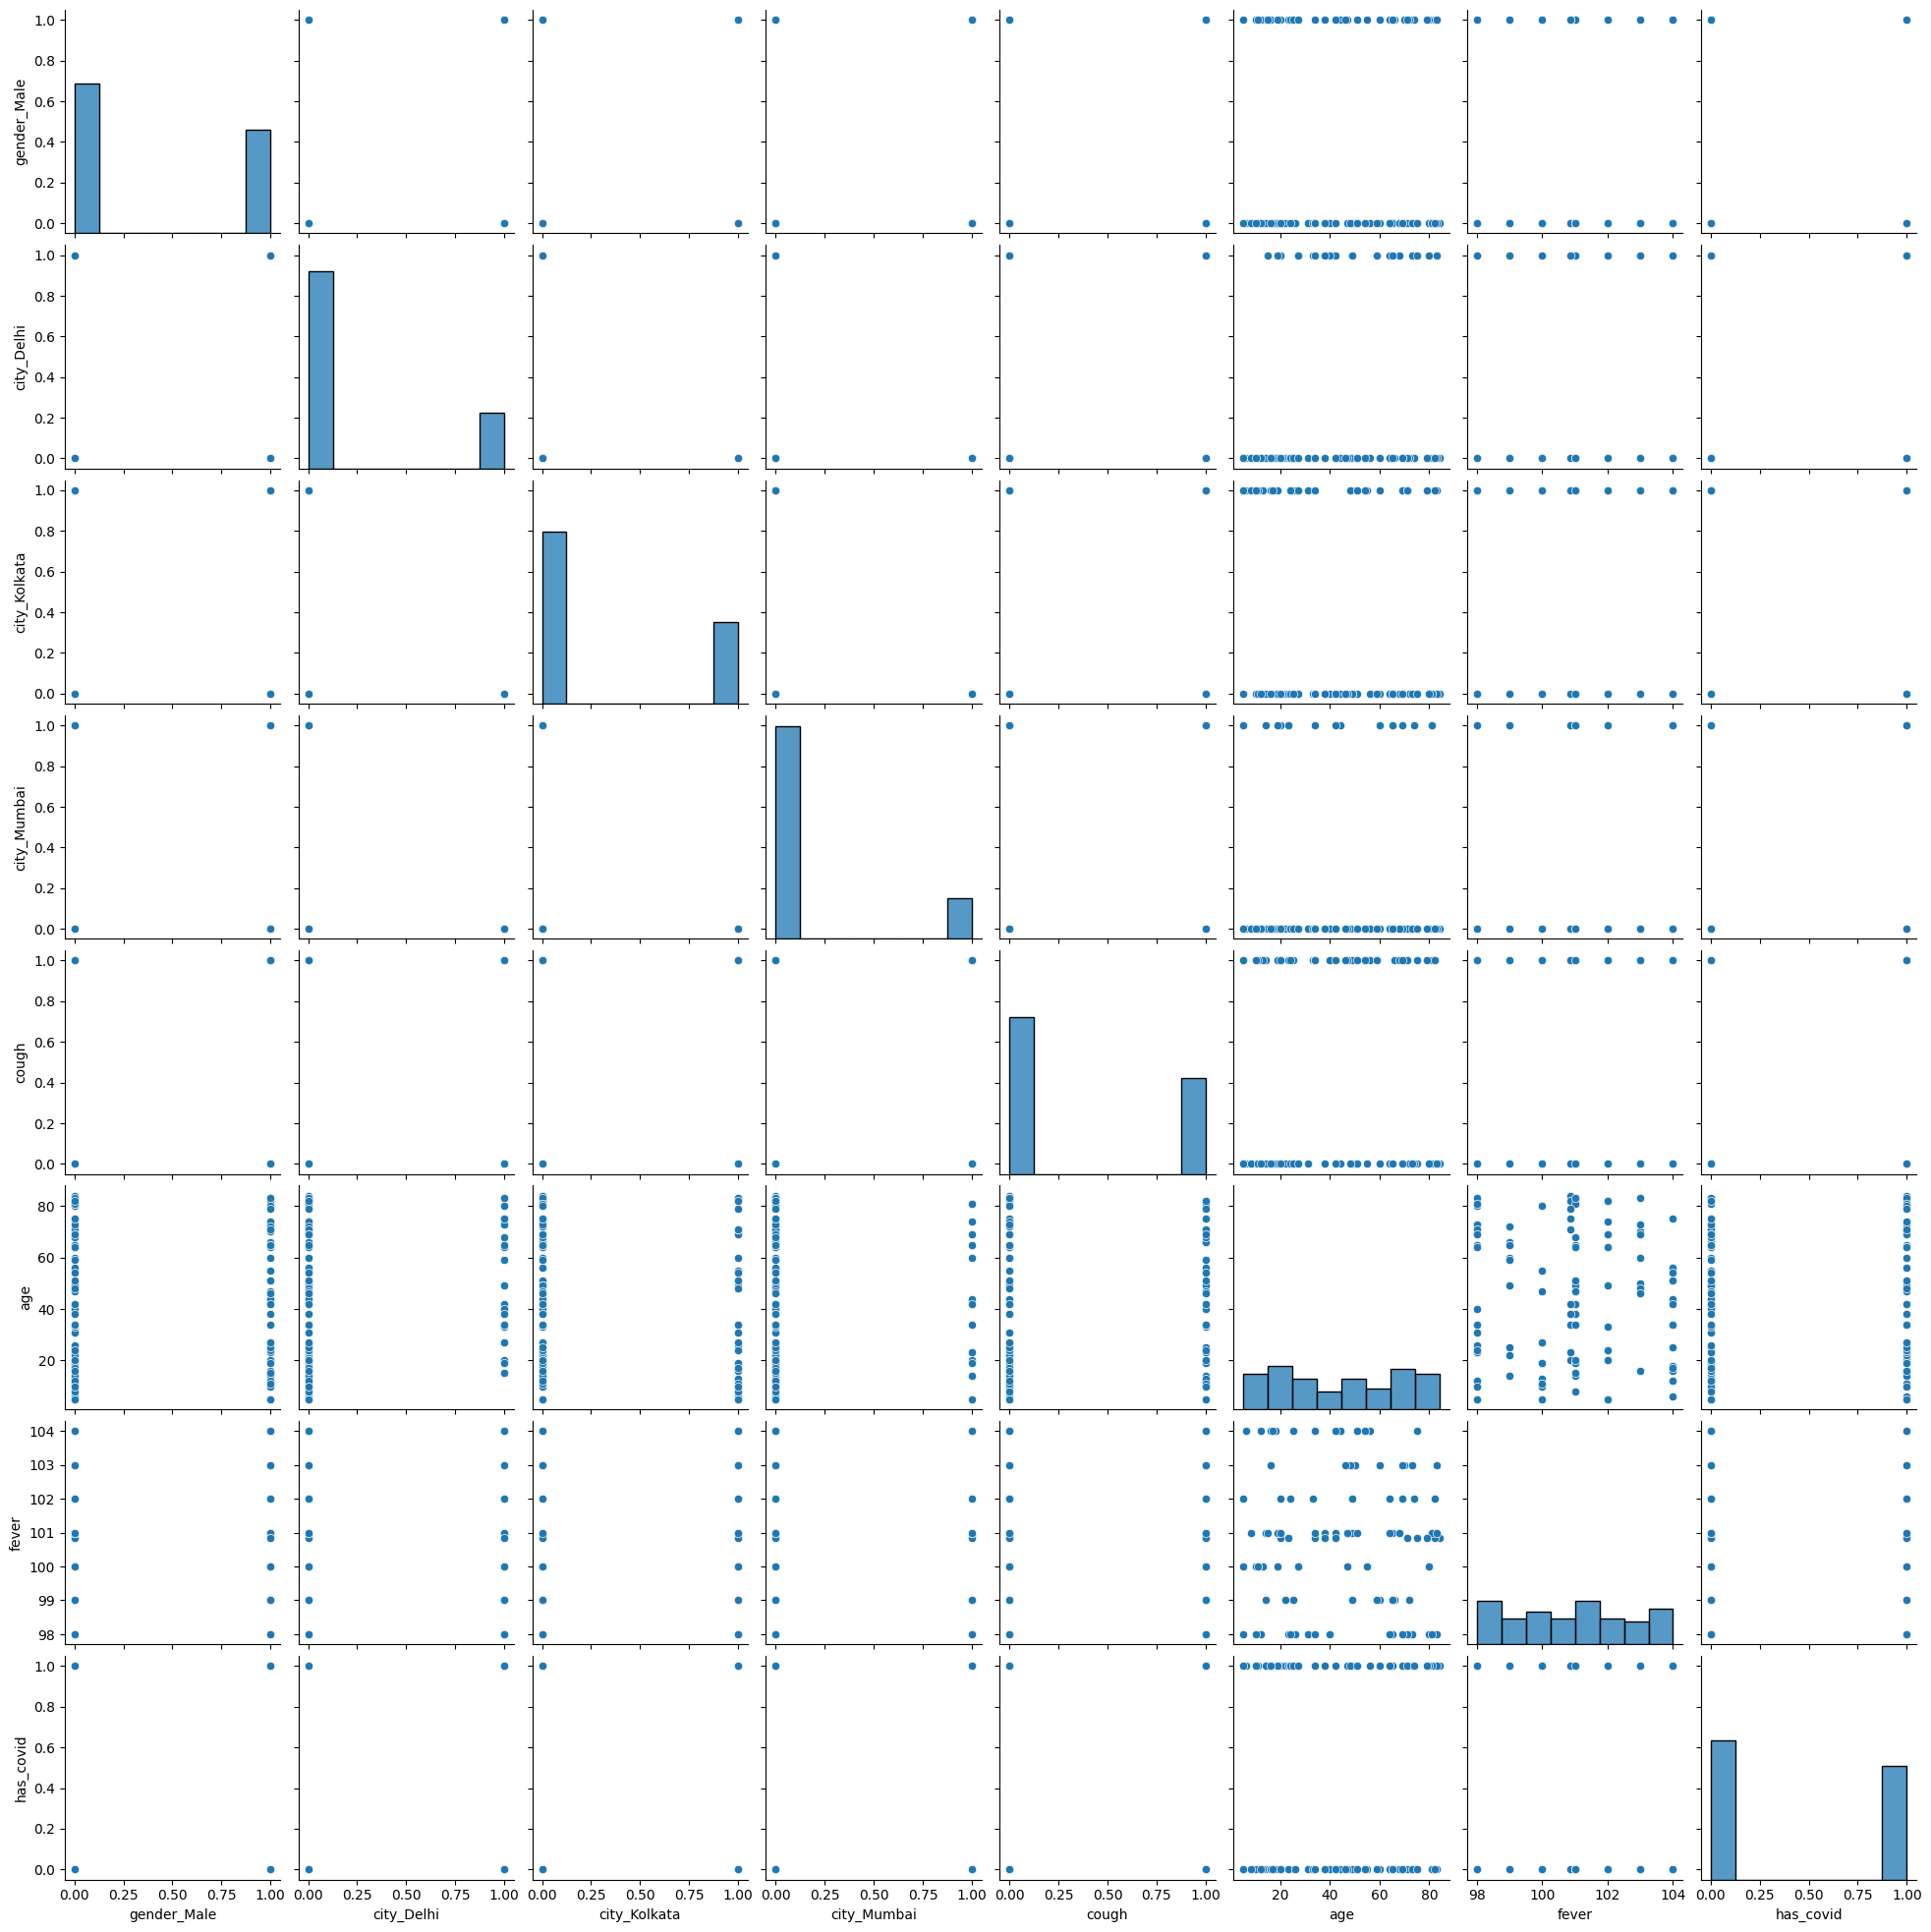

In [100]:
sns.pairplot(df_transformed)
plt.show()

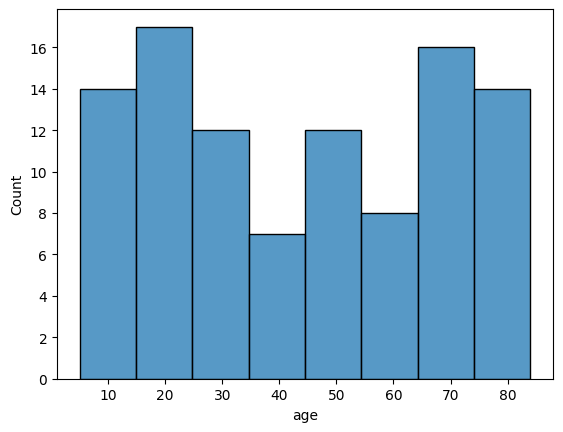

In [101]:
sns.histplot(df_transformed['age'])
plt.show()

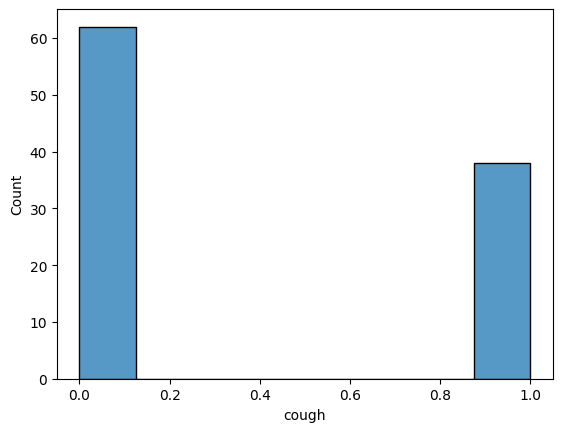

In [102]:
sns.histplot(df_transformed['cough'])
plt.show()

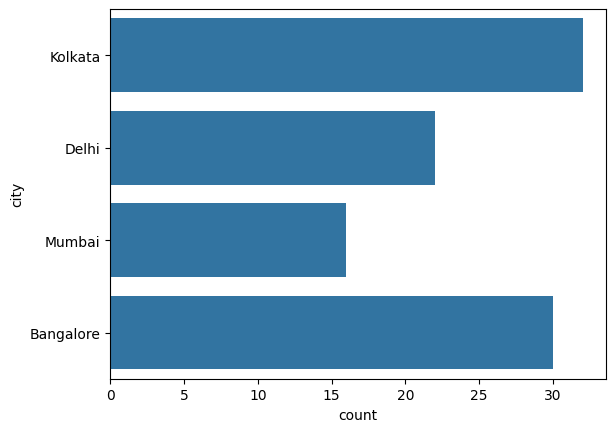

In [106]:
sns.countplot(df['city'])
plt.show()

In [107]:
df['city'].value_counts()

,count
city,
Kolkata,32
Bangalore,30
Delhi,22
Mumbai,16


In [108]:
df['has_covid'].value_counts()

,count
has_covid,
No,55
Yes,45


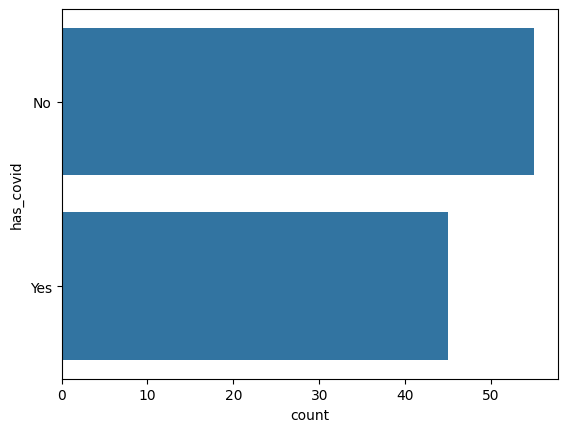

In [109]:
sns.countplot(df['has_covid'])
plt.show()

In [112]:
import pandas as pd

# Assuming 'df' is your DataFrame
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
correlation_matrix = numerical_df.corr()  # Calculate correlation on numerical data
print(correlation_matrix)

            age     fever
age    1.000000 -0.016749
fever -0.016749  1.000000
